In [125]:
import pandas as pd
import matplotlib as plt
import scipy
import sqlite3

# connect to SQLite database
conn = sqlite3.connect('snic_provincias.db')

# see some types
# query = "SELECT DISTINCT codigo_delito_snic_nombre AS Tipo FROM prov_stats LIMIT 10"

# df = pd.read_sql_query(query, conn)
# print(df)


In [126]:
# query the database with type wanted
query = """
    SELECT provincia_nombre AS Provincia, anio AS Año, codigo_delito_snic_nombre AS Tipo,
        cantidad_victimas AS Victimas, tasa_victimas AS Tasa
    FROM prov_stats
    WHERE Año = 2022 AND Tipo = 'Homicidios dolosos'
    ORDER BY Tasa DESC
    """

df = pd.read_sql_query(query, conn)
print(df)

              Provincia   Año                Tipo  Victimas       Tasa
0              Santa Fe  2022  Homicidios dolosos       409  11.392761
1                Chubut  2022  Homicidios dolosos        36   5.631212
2              Misiones  2022  Homicidios dolosos        71   5.510386
3               Neuquén  2022  Homicidios dolosos        36   5.288471
4               Formosa  2022  Homicidios dolosos        31   5.043061
5               Tucumán  2022  Homicidios dolosos        82   4.728629
6          Buenos Aires  2022  Homicidios dolosos       740   4.139688
7                 Chaco  2022  Homicidios dolosos        49   3.991086
8            Santa Cruz  2022  Homicidios dolosos        14   3.647477
9                 Salta  2022  Homicidios dolosos        53   3.631684
10  Santiago del Estero  2022  Homicidios dolosos        34   3.406496
11              Mendoza  2022  Homicidios dolosos        69   3.398913
12             San Luis  2022  Homicidios dolosos        16   3.071931
13    

### Estimates of Location: key ideas
- The basic metric for location is the mean, but it can be sensitive to extreme
values (outlier).
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual
distributions and hence are more robust.

In [127]:
# Intentional homicide rate Mean
df['Tasa'].mean()

3.6468058041666667

In [128]:
# Intentional homicide rate Median
df['Tasa'].median()

3.2354219

In [129]:
# Intentional homicide rate Trimmed Mean
# good idea to exclude the Santa Fe outlier
scipy.stats.trim_mean(df['Tasa'], 0.1)

3.3942482849999998

### Estimates of Variability: key ideas
- Variance and standard deviation are the most widespread and routinely reported
statistics of variability.
- Both are sensitive to outliers.
- More robust metrics include mean absolute deviation, median absolute deviation
from the median, and percentiles (quantiles).

In [130]:
# Intentional homicide rate Standard Deviation
df['Tasa'].std()
# variance is the same squared

2.070332627249644

In [131]:
# Intentional homicide rate IQR
# it is not sensitive to the Santa Fe outlier so its smaller than STD
df['Tasa'].quantile(0.75) - df['Tasa'].quantile(0.25) 
# the MAD is calculated in R

1.9102415249999996

### Data distribution: key ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a histogram.
- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates are possible, of course).

In [132]:
# Percentiles / quantiles
df['Tasa'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.582775
0.25    2.376682
0.50    3.235422
0.75    4.286923
0.95    5.613088
Name: Tasa, dtype: float64

Text(0, 0.5, 'Intentional homicide rate')

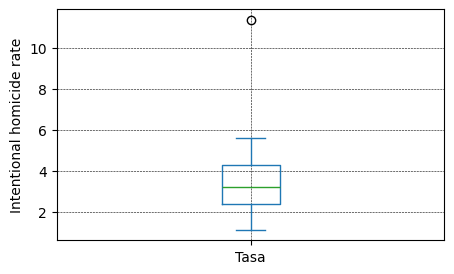

In [133]:
# homicide rate Boxplot
ax = (df['Tasa']).plot.box(figsize=(5,3))
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_ylabel('Intentional homicide rate')

The _whiskers_ will not go beyond 1.5 times the IQR. The green line is the median, the top and bottom of the box are the .25 and .75 quantiles. The dot from upside is the Santa Fe outlier.

In [134]:
# homicide rate Frecuency table
pd.cut(df['Tasa'], 5).value_counts() # divide it into 5 equal size segments

Tasa
(1.118, 3.181]    12
(3.181, 5.234]     8
(5.234, 7.287]     3
(9.34, 11.393]     1
(7.287, 9.34]      0
Name: count, dtype: int64

Text(0.5, 0, 'Intentional homicide rate')

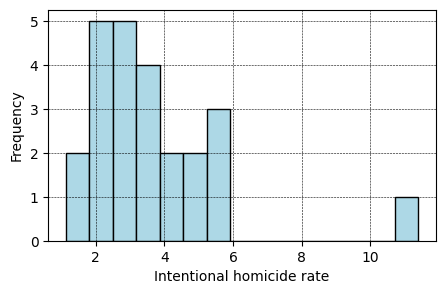

In [135]:
# homicide rate Histogram, showing the frecuency of each interval value
ax = (df['Tasa']).plot.hist(figsize=(5,3), bins=15,
                            color="lightblue", edgecolor="black")
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_xlabel("Intentional homicide rate")

Text(0.5, 0, 'Intentional homicide rate')

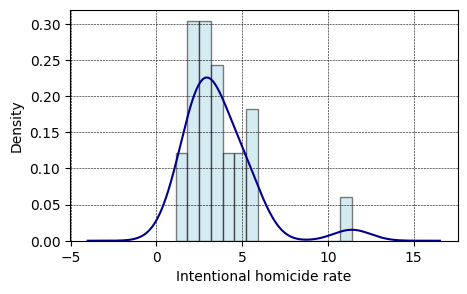

In [136]:
# homicide rate Density plot
ax = (df['Tasa']).plot.hist(density=True, figsize=(5,3), bins=15, 
                            color="lightblue", edgecolor="black", alpha=0.5)
(df['Tasa']).plot.density(ax=ax, color="darkblue")
ax.grid(True, linewidth="0.4", color="black", linestyle="--")
ax.set_xlabel("Intentional homicide rate")